# Importando Blibiotecas

In [374]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from neuralprophet import NeuralProphet
import seaborn as sns
import statsmodels.api as sm

# Importando os dados

In [375]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
df_demandas.columns = ['ds','y']

# Fase de Testes

In [376]:
qtd_previsoes = 1
n_lags = 52
'''
indices_mudanca = [0,46,83,len(df_demandas)-1]
pontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'''

'\nindices_mudanca = [0,46,83,len(df_demandas)-1]\npontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'

In [377]:
params = { "growth": "off",
           #"trend_reg": 0.01,
           #"changepoints_range":0.3,
           "n_forecasts":qtd_previsoes,
           "n_changepoints": 0,
           #"batch_size": 50,
           "n_lags": n_lags,
           "learning_rate": 0.1,
           "epochs": 100,
           #"changepoints": pontos_mudanca,
           "yearly_seasonality":2, #ao se colocar um numero, ele defini o grau da serie de fourier, por padrao e 6
           "weekly_seasonality":False,
           "daily_seasonality":False,
           "num_hidden_layers":3,
           "d_hidden":52
        }

In [378]:
model = NeuralProphet(**params)

In [379]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

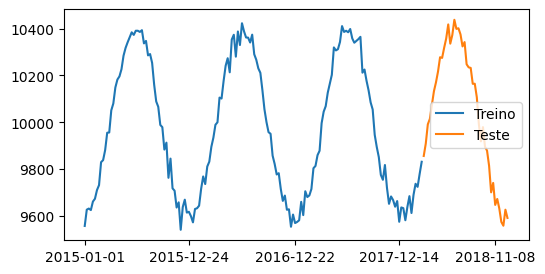

In [380]:
fig=plt.figure(figsize=(6,3))
plt.plot(df_train.ds,df_train.y,label='Treino')
plt.plot(df_test.ds,df_test.y,label='Teste')
plt.xticks([df_demandas.iloc[i,0] for i in [0,51,103,154,201]])
plt.legend()

In [381]:
metrics = model.fit(df_train,freq='7d')
previsoes = model.predict(df_demandas)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


([<matplotlib.axis.XTick at 0x148c82172e0>,
 [Text(0, 0, '0'), Text(50, 0, '50'), Text(100, 0, '100')])

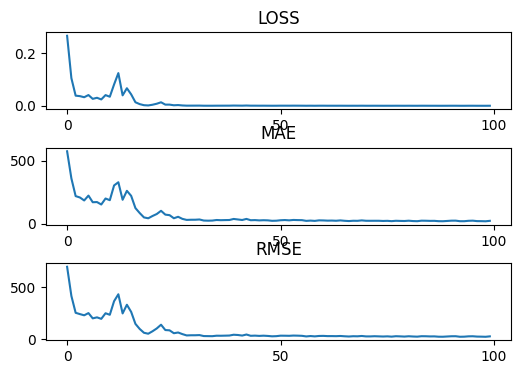

In [382]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS')
plt.plot(metrics.Loss)
plt.xticks([0,50,100])

ax=fig.add_subplot(3,1,2)
ax.set_title('MAE')
plt.plot(metrics.MAE)
plt.xticks([0,50,100])

ax=fig.add_subplot(3,1,3)
ax.set_title('RMSE')
plt.plot(metrics.RMSE)
plt.xticks([0,50,100])

In [383]:
model.plot_parameters(components=['Trend','Seasonality'])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '0ab3c51b-6a68-4582-8c98-09a848ffc25a',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2018, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9948.911, 9948.911], dtype=float32),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'uid': 'e611293f-47dd-408a-9e88-3775a6013d49',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0), ...,
                          datetime.

In [384]:
previsoes_test = previsoes['yhat1'].iloc[166:].values

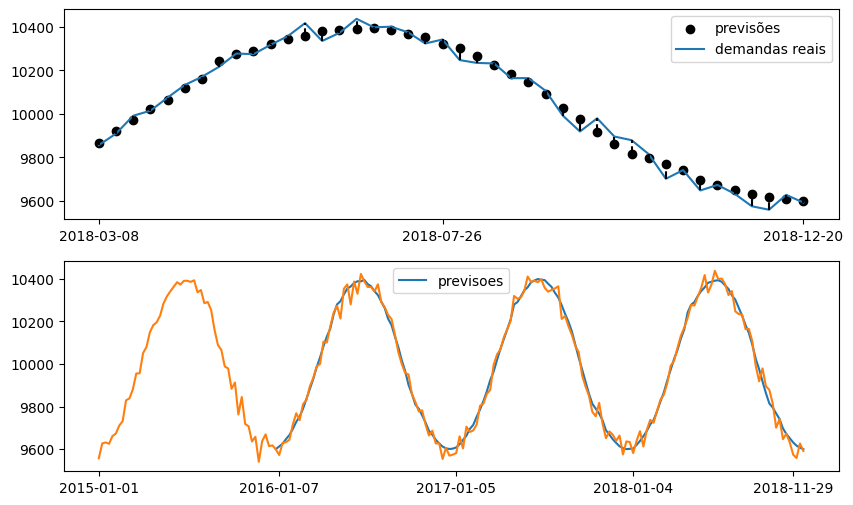

In [385]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)


plt.scatter(df_test.ds,previsoes_test,label='previsões',color='black')
plt.plot(df_test.ds,df_test.y,label='demandas reais')

indice = 0 
for i in range(len(previsoes_test)):
    if previsoes_test[i] > df_test.y.iloc[i]:
        plt.vlines(x=i, ymin=df_test.y.iloc[i], ymax=previsoes_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsoes_test[i], ymax=df_test.y.iloc[i],linestyle='--',color='black')
    indice+=1
plt.xticks([df_test.iloc[i,0] for i in [0,int((len(df_test)-1)/2),len(df_test)-1]])
plt.legend()




ax=fig.add_subplot(2,1,2)
plt.plot(df_demandas.ds,previsoes['yhat1'],label='previsoes')
plt.plot(df_demandas.ds,df_demandas.y)
plt.xticks([df_demandas.iloc[i,0] for i in [0,53,105,157,204]])
plt.legend()

In [386]:
residuos = np.array(df_test.y)-previsoes_test

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

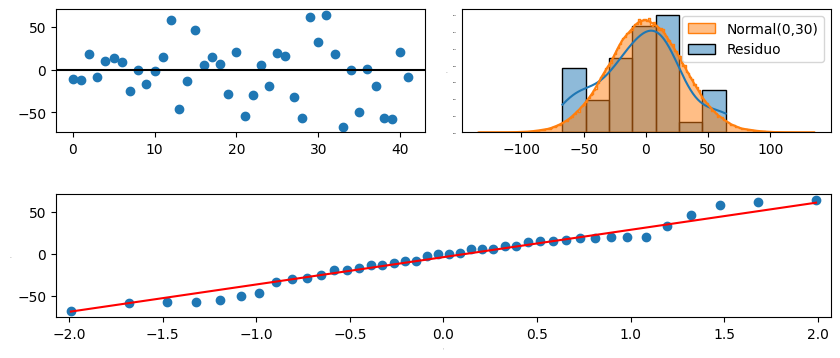

In [387]:
fig=plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

ax=fig.add_subplot(2,2,1)

plt. axhline(y=0,xmin=0,xmax=len(df_test.y),color='black')
plt.scatter(range(len(residuos)),residuos)

ax=fig.add_subplot(2,2,2)
sns.histplot(residuos,kde=True,stat='density',label="Residuo")
sns.histplot(np.random.normal(0, 30,200000),kde=True,stat='density',element='step',label='Normal(0,30)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(2,1,2)
sm.qqplot(residuos,line='s',ax=ax)
plt.ylabel([], fontsize=0)
plt.xlabel([], fontsize=0)
plt.show()

In [388]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsoes_test, df_test.y, axis=0),'  MAE_Teste =',sm.tools.eval_measures.meanabs(previsoes_test, df_test.y, axis=0) )

print('RMSE_Treino =',metrics['RMSE'].tail(1).values[0],'   MAE_Treino =',metrics['MAE'].tail(1).values[0])

RMSE_Teste = 32.55520551013137   MAE_Teste = 25.56196067565075
RMSE_Treino = 29.115747451782227    MAE_Treino = 23.7158203125


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$


# Fase de previsao

A própria da documentação, avisa de antes de fazer qualquer previsão real, reajuste o modelo para receber todos os dados

In [389]:
for i in range(30):#prevendo i-esimo conjunto de demandas

    model = NeuralProphet(**params)
    metrics = model.fit(df_demandas,freq='7d')

    previsao = df_demandas.copy()
    for idx in range(52):#prevendo o conjunto de 52 demandas
        future = model.make_future_dataframe(df=previsao)
        temp = model.predict(future)
        temp['y'] = temp[['y','yhat1']].fillna(0).sum(axis=1)
        temp = temp[['ds','y']]
        previsao = previsao.append(temp.iloc[-1])
    previsao = previsao.iloc[-52:].reset_index(drop=True).y

    #salvando as previsao
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{i}.txt", "w") as arquivo:

        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.528% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.531% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.533% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.535% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.537% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.539% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.541% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.543% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.545% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.55% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.554% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.558% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.561% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.565% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.573% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.574% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.58% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.59% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.593% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.595% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.597% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.598% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.6% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.603% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.606% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.608% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.609% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.611% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.614% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Temp\ipykernel_9300\1981960826.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


